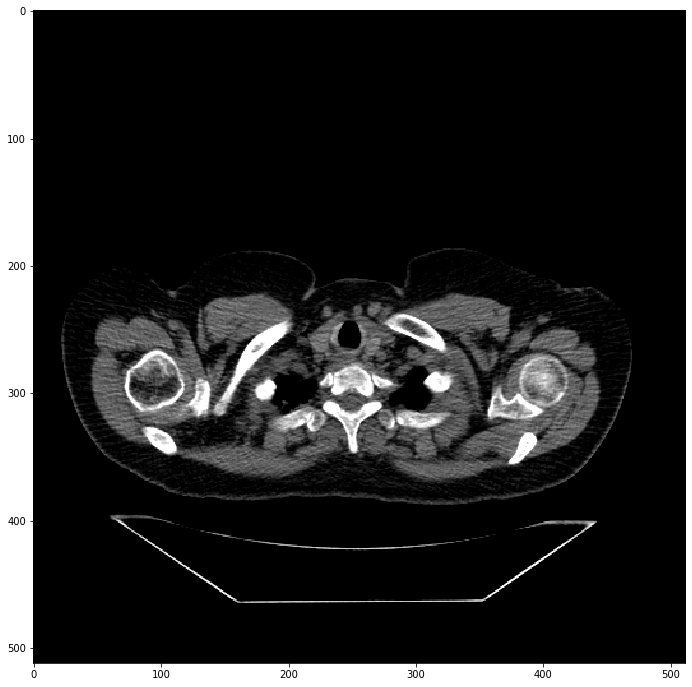

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
im = imageio.imread('./chest-data/chest-220.dcm')
plt.figure(figsize=(12,12))
plt.imshow(im,cmap='gray', vmin=-100, vmax=300)
plt.show()

In [2]:
im.shape

(512, 512)

In [3]:
import imageio
print(dir(imageio))

['RETURN_BYTES', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'core', 'formats', 'get_reader', 'get_writer', 'help', 'imread', 'imsave', 'imwrite', 'mimread', 'mimsave', 'mimwrite', 'mvolread', 'mvolsave', 'mvolwrite', 'plugins', 'read', 'save', 'show_formats', 'volread', 'volsave', 'volwrite']


In [4]:
import imageio
vol = imageio.volread('chest-data') #批次讀取

Reading DICOM (examining files): 1/5 files (20.0%5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)


In [25]:
view_1v2 =vol[:, :, :]
view_1v2[0,...]

Array([[-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       ...,
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000],
       [-1000, -1000, -1000, ..., -1000, -1000, -1000]], dtype=int16)

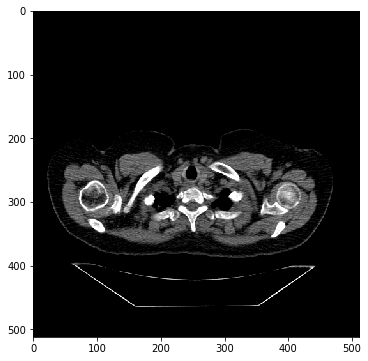

In [43]:
# 如何將value [0..255] 再呈現
data = view_1v2[0,...]
plt.figure(figsize=(6,6))
plt.imshow(data, cmap='gray' , vmin=-100, vmax=300)
plt.show()

In [38]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler?

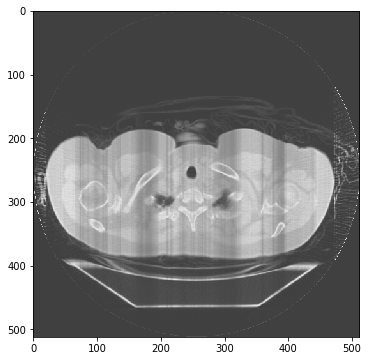

In [41]:
# 如何將value [0..255] 再呈現
data = view_1v2[0,...]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 255))
img255 = scaler.fit_transform(data).astype('int')
np.min(img255), np.max(img255)
plt.figure(figsize=(6,6))
plt.imshow(img255, cmap='gray' , vmin=-100, vmax=300)
plt.show()


轉換255前的最小與最大值
最小數值: -1000
最大數值: 1102

轉換255後的最小與最大值
最小數值: 0
最大數值: 255


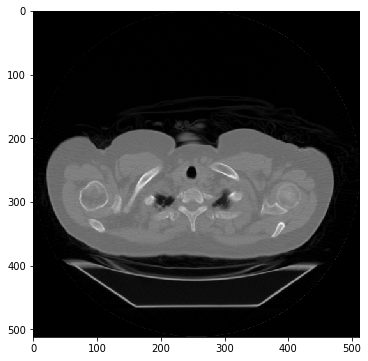

In [46]:
# 感謝 同學 提供方式
img = view_1v2[0,...]
print("轉換255前的最小與最大值")
print("最小數值:", np.min(img) )
print("最大數值:", np.max(img) )

# 轉為 0~255
img255 = ( ( (img - (-1000)) / 2102 ) * 255 ).astype("int")
print("\n轉換255後的最小與最大值")
print("最小數值:", np.min(img255) )
print("最大數值:", np.max(img255) )


plt.figure(figsize=(6,6))
plt.imshow(img255, cmap='gray')
plt.show()

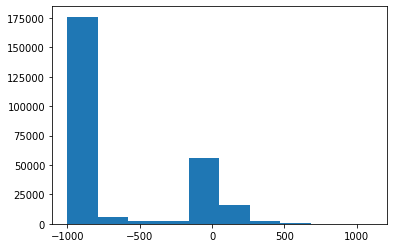

In [6]:
# 看影像pixel數值分布
import matplotlib.pyplot as plt
plt.hist(view_1v2[0,...].ravel())
plt.show()

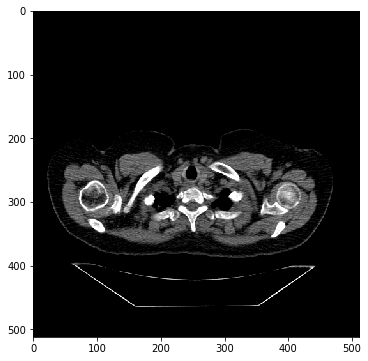

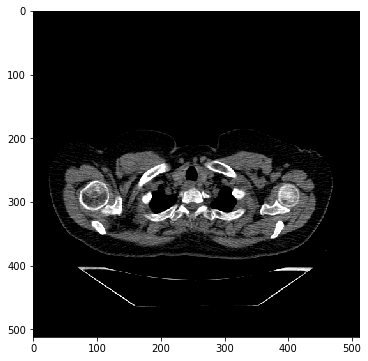

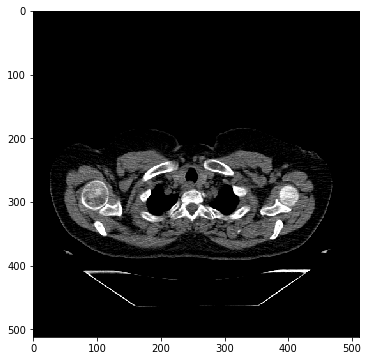

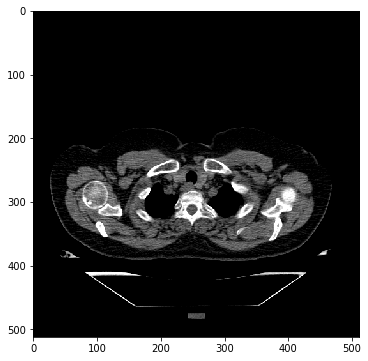

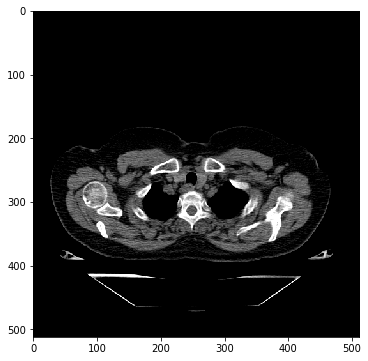

In [7]:
import matplotlib.pyplot as plt
for i in range(view_1v2.shape[0]):    
    plt.figure(figsize=(6,6))
    plt.imshow(view_1v2[i,...], cmap='gray', vmin=-100, vmax=300)
    plt.show()
    